<h1 style='text-align: center; font-size: 38px; font-weight: bold; color: #a53860;'> Linear Regression </h1>

<p style='text-align: center; color: #212121;'> This notebook aims to be a place where I can practice Deep Learning with Pythorch in a pratical way. I'll be implementing a Linear Regression model. </p>

<h3 style='color: #da627d; text-align: center;'> Setting Up </h3>

In [23]:
%pip install loguru --quiet

Note: you may need to restart the kernel to use updated packages.


In [97]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from loguru import logger
from tqdm import tqdm
from torch import nn
import pandas as pd
import numpy as np
import torch

%matplotlib inline

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

df = pd.concat([test, train], axis=0, ignore_index=True)

if len(df) != len(train) + len(test):
  logger.error('There is a problem with the dataframe length.')
  raise ValueError('train and test are not the same length')
else:
  logger.success('Dataframe generated successfully with a length of {}.'.format(len(df)))

2023-08-13 16:20:08.796 | SUCCESS  | __main__:<module>:22 - Dataframe generated successfully with a length of 1000.


<h3 style='color: #da627d; text-align: center;'> Quick EDA </h3>

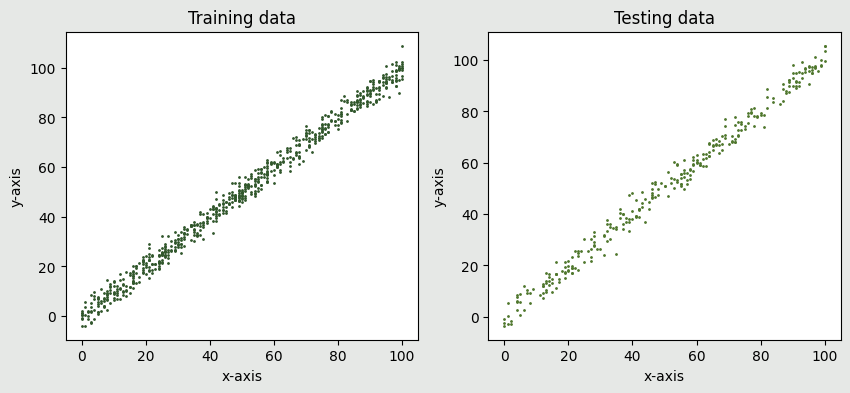

<Figure size 400x350 with 0 Axes>

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

plt.figure(figsize=(4, 3.5))
fig.patch.set_facecolor('#e6e8e6')

ax1.scatter(train['x'], train['y'], color='#31572c', s=1)
ax1.set_title('Training data')
ax1.set_xlabel('x-axis')
ax1.set_ylabel('y-axis')

ax2.scatter(test['x'], test['y'], color='#4f772d', s=1)
ax2.set_title('Testing data')
ax2.set_xlabel('x-axis')
ax2.set_ylabel('y-axis')

plt.tight_layout()
plt.show()